# Simulation of Dynamic Systems

Using [odeint](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html) of scipy

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import math

**Scenario D1: Let's look at a simple Population dynamics.**

The rate of change of population $P(t)$ of a region is affected by its birth rate and death rate as follows

$\displaystyle \frac{dP}{dt} = Births - Deaths = bP - dP$

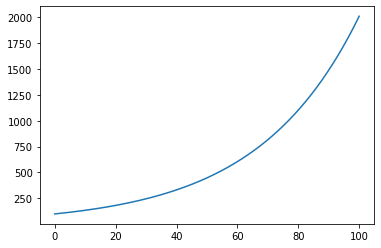

In [10]:
#Inputs
b=0.05
d=0.02

#Initial condition
P0 = 100

#Model
def popModel(P, t, b, d): #First input is Equations/state, Time, then optional input parameters
  dP_dt = b*P - d*P
  return dP_dt

#time line
t = np.linspace(0, 100, 1000)

#simulate
Pop = odeint(popModel, P0, t, args=(b, d))

#plot
plt.plot(t, Pop)

**Scenario D2: Simple Harmonic Motion**

A simple pendulum consists of a ball (point-mass) m hanging from a (massless) string of length L and fixed at a pivot point P. When displaced to an initial angle and released. If the amplitude of angular displacement is small enough, so the small angle approximation ($\sin\theta\approx\theta$) holds true, then the equation of motion reduces to the equation of simple harmonic motion.

$\displaystyle \frac{d^2\theta}{dt^2} = -\frac{g}{L}\theta$

This second order differential equation can be rewritten as a pair of coupled first order differential equations.

$\displaystyle \frac{d\theta}{dt} = v$  and 

 $\displaystyle \frac{dv}{dt}=-\frac{g}{L}\theta$

Let's simulate this

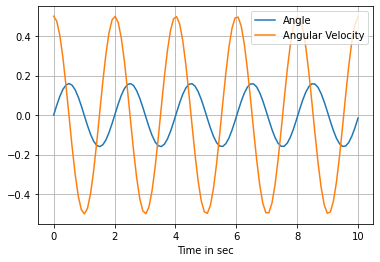

In [11]:
#Inputs
g=9.81
L=1

#Initial condition
  #we have 2 variables v and theta
Var0 = [0, 0.5]

#Model
def shm(Var, t, g, L):
  theta = Var[0]
  v = Var[1]
  dTheta_dt = v
  dv_dt = -g*theta/L
  return dTheta_dt, dv_dt

#time line
t = np.linspace(0,10, 100)

#simulate
Var = odeint(shm, Var0, t, args=(g, L))

#print(Var)
#plot
plt.plot(t, Var[:,0], label='Angle')
plt.plot(t, Var[:,1], label='Angular Velocity')
plt.legend()
plt.xlabel('Time in sec')
plt.grid()

**Scenario D3: The real non-linear simple pendulum**

When the angular displacement amplitude of the pendulum is large enough that the small angle approximation no longer holds, then the equation of motion must remain in its nonlinear form.

$\displaystyle \frac{d^2\theta}{dt^2} = -\frac{g}{L}\sin\theta$

Let's expand it to inlcude damping also. Thus,

$\displaystyle \frac{d^2\theta}{dt^2} + \frac{b}{m}\frac{d\theta}{dt} +\frac{g}{L}\sin\theta = 0$ 

We will convert it into 2 simultaneous ODEs

$\displaystyle \frac{d\theta}{dt} = v$

$\displaystyle \frac{dv}{dt} = -\frac{b}{m}\frac{d\theta}{dt} -\frac{g}{L}\sin\theta$

Let's simulate this.

**The below cell is partially complete. You need to insert the function**


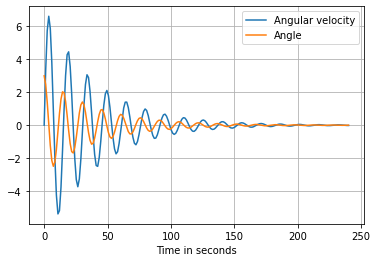

In [12]:
#Inputs
g = 9.81
L = 1
b = 0.05
m = 1

#Initial condition
Var0 = [0,3]  #we have 2 variables v and theta

#Model
def HM(Var, t, g, L, b, m):
  v=Var[1]                           ### have to take v=3, and theta=0 to get the desired output ?? why
  theta=Var[0]
  dTheta_dt = v
  dv_dt = -((b/m)*dTheta_dt) -(g*np.sin(2*np.pi*theta/360)/L)
  return dTheta_dt, dv_dt

# timespace
t = np.linspace(0,240,200)  

# simulate  
Var = odeint(HM,Var0,t,args=(g,L,b,m))

# plot the results
plt.plot(t, Var[:,0], label='Angular velocity')
plt.plot(t, Var[:,1], label='Angle')
plt.legend()
plt.xlabel('Time in seconds')
plt.grid()



---



**Scenario D4: SIR Epidemics Model**

A simple mathematical description of the spread of a disease in a population is the so-called SIR model, which divides the (fixed) population of $N$ individuals into three "compartments" which may vary as a function of time, $t$:

* $S(t)$ are those susceptible but not yet infected with the disease;
* $I(t)$ is the number of infectious individuals;
* $R(t)$ are those individuals who have recovered from the disease and now have immunity to it.

The SIR model describes the change in the population of each of these compartments in terms of two parameters, $
\beta$ and $\gamma$. $\beta$ describes the effective contact rate of the disease: an infected individual comes into contact with $\beta N$ other individuals per unit time (of which the fraction that are susceptible to contracting the disease is $S/N$). $\gamma$ is the mean recovery rate: that is, $1/\gamma$ is the mean period of time during which an infected individual can pass it on.

The differential equations describing this model is as follows:

$\displaystyle \frac{dS}{dt}=-\frac{\beta S I}{N}$,

$\displaystyle \frac{dI}{dt}= \frac{\beta S I}{N} - \gamma I$,

$\displaystyle \frac{dR}{dt}=\gamma I$,

Assume parameters $\beta=0.2, 1/\gamma=10$ days in a population of $N=1000$. The model is started with a single infected individual on day 0: $I(0)=1$.

403.67592967116343


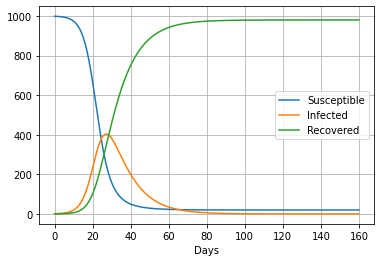

In [13]:
#Inputs
N = 1000 #Total population
beta, gamma = 0.4, 1.0/10

#Initial conditions (initial values of Infected, Recovered and Susceptible population)
I0, R0 = 1, 0
S0 = N - I0 - R0
# Initial conditions vector
y0 = S0, I0, R0

# The SIR model differential equations Model.
def SIRmodel(y, t, N, beta, gamma):
  S, I, R = y
  dS_dt = -beta*S*I/N
  dI_dt = beta*S*I/N - gamma*I
  dR_dt = gamma*I
  return dS_dt, dI_dt, dR_dt

#timepoints
t = np.linspace(0, 160, 160)

# Integrate/Simulate the SIR equations over the time grid, t.
eqn = odeint(SIRmodel, y0, t, args=(N, beta, gamma))

S, I, R = eqn.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
plt.plot(t,S, label='Susceptible')
plt.plot(t,I, label='Infected')
plt.plot(t,R, label='Recovered')
plt.legend()
plt.xlabel('Days')
plt.grid()
print(max(I))

### To Do

Suppose in the above SIR model, the recovered people may lose immunity after *k* days on an average, and again become susceptible to the disease. Hence the equations become:

$\displaystyle \frac{dS}{dt}= R/k -\frac{\beta S I}{N}$,

$\displaystyle \frac{dI}{dt}= \frac{\beta S I}{N} - \gamma I$,

$\displaystyle \frac{dR}{dt}=\gamma I - R/k$  

Suppose $k=60$ days. All other parameters are as given earlier. Simulate this (SIRS) model.


Maximum number of infected people within this timespan:  416.1092942823787


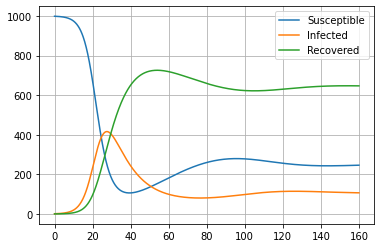

In [14]:
#Inputs
N=1000 #Total populatin
beta, gamma, k = 0.4, 0.1, 60

#Initial conditions (initial values of Infected, Recovered and Susceptible population)
I0,R0 = 1,0
S0 = N - I0 - R0
# Initial conditions vector
y0 = S0, I0, R0

# The SIR model differential equations Model.
def SIRmodel_modified(y, t, N, beta, gamma, k):
  S,I,R=y
  dS_dt=(R/k)-(beta*S*I/N)
  dI_dt=(beta*S*I/N) - (gamma*I)
  dR_dt=(gamma*I) - (R/k)
  return dS_dt,dI_dt,dR_dt

#timepoints
t = np.linspace(0,160,1000)

# Integrate/Simulate the SIR equations over the time grid, t.
eqn=odeint(SIRmodel_modified, y0, t, args=(N,beta,gamma,k))

S,I,R=eqn.T 

# Plot the data on three separate curves for S(t), I(t) and R(t)
plt.plot(t,S,label='Susceptible')
plt.plot(t,I,label='Infected')
plt.plot(t,R,label='Recovered')
plt.legend()
plt.xlabel=('Days')
plt.grid()
print('Maximum number of infected people within this timespan: ', np.max(I))